In [45]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [51]:
# Load dataset
names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.csv', names=names)

In [3]:
# Shape
dataset.shape

(150, 5)

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

*groupby()* : groups the data in the dataset by the unique values in the 'class' column.<br>
*size()* : counts the number of occurrences (rows) in each group.

sepal-length       Axes(0.125,0.53;0.352273x0.35)
sepal-width     Axes(0.547727,0.53;0.352273x0.35)
petal-length       Axes(0.125,0.11;0.352273x0.35)
petal-width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

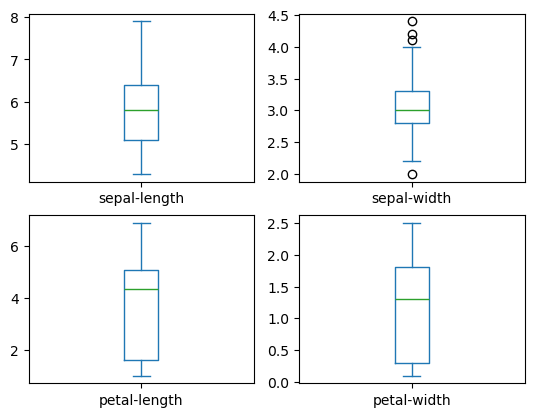

In [7]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

*kind='box'* :  specifies that a box plot should be created. A box plot visualizes the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.<br>
*subplots=True* :  indicates that separate subplots should be created for each column in the DataFrame.<br>
*layout=(2,2)* :  arranges the subplots in a 2x2 grid.<br>
*sharex=False* specifies that the subplots should not share the same x-axis and the same for *sharey*.


array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

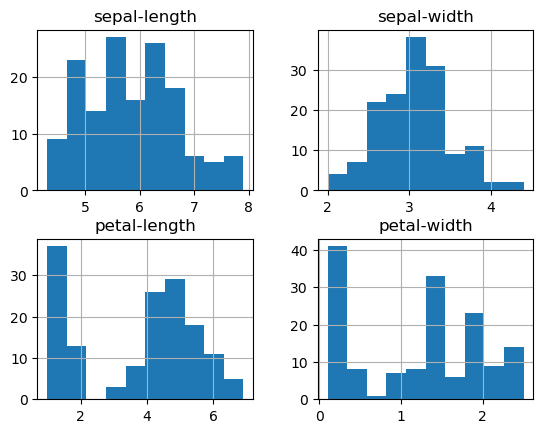

In [8]:
dataset.hist()

*hist()* : generates histogram plots for each numeric column in the DataFrame.

array([[<Axes: xlabel='sepal-length', ylabel='sepal-length'>,
        <Axes: xlabel='sepal-width', ylabel='sepal-length'>,
        <Axes: xlabel='petal-length', ylabel='sepal-length'>,
        <Axes: xlabel='petal-width', ylabel='sepal-length'>],
       [<Axes: xlabel='sepal-length', ylabel='sepal-width'>,
        <Axes: xlabel='sepal-width', ylabel='sepal-width'>,
        <Axes: xlabel='petal-length', ylabel='sepal-width'>,
        <Axes: xlabel='petal-width', ylabel='sepal-width'>],
       [<Axes: xlabel='sepal-length', ylabel='petal-length'>,
        <Axes: xlabel='sepal-width', ylabel='petal-length'>,
        <Axes: xlabel='petal-length', ylabel='petal-length'>,
        <Axes: xlabel='petal-width', ylabel='petal-length'>],
       [<Axes: xlabel='sepal-length', ylabel='petal-width'>,
        <Axes: xlabel='sepal-width', ylabel='petal-width'>,
        <Axes: xlabel='petal-length', ylabel='petal-width'>,
        <Axes: xlabel='petal-width', ylabel='petal-width'>]], dtype=object)

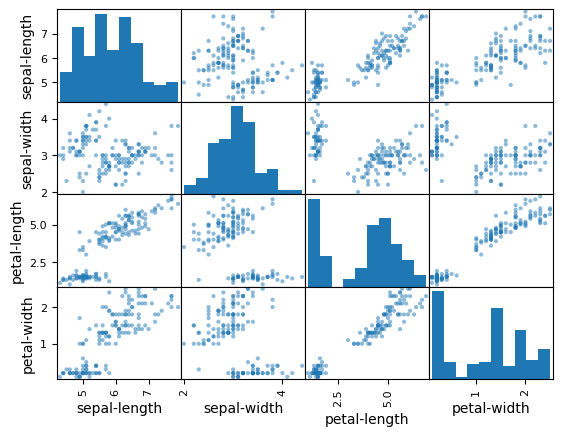

In [9]:
pd.plotting.scatter_matrix(dataset)

*scatter_matrix* : Each subplot in the scatter matrix is a scatter plot comparing two different columns from the dataset.

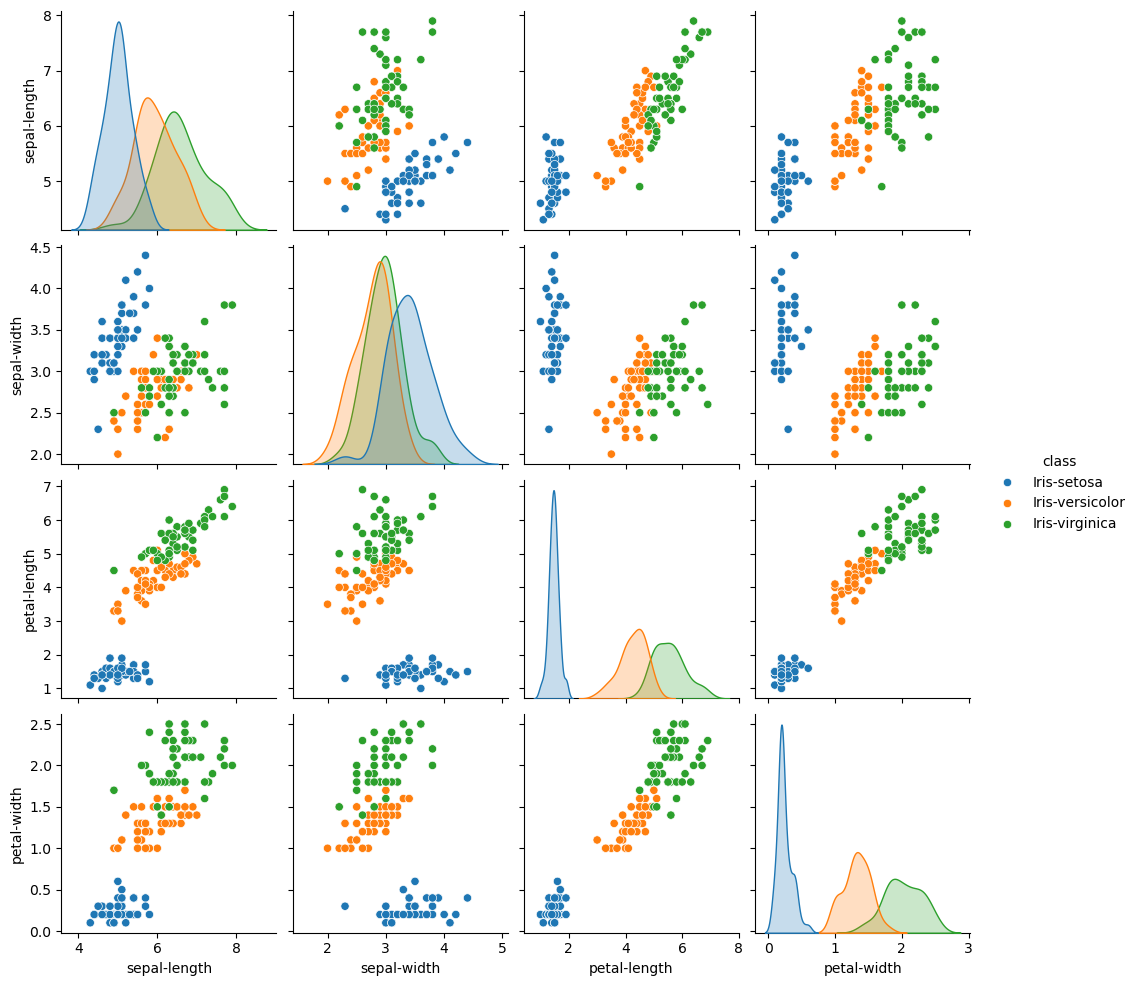

In [44]:
sns.pairplot(dataset, hue='class')

*hue='class'* :  parameter colors the points in the scatter plots according to the different categories in the 'class' column. This is particularly useful for visualizing how different classes are distributed and how they relate to each other.<br>
==> Iris-setosa is much seperated from the other two types<br>
==> Iris-virginica is the longest one.<br>
==> Iris-setosa is the shortest one <br>

In [54]:
# Calculate average of each features for all classes
y_data = np.array([np.average(X[:, i] [y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(y))])
y_data_reshaped = y_data.reshape(4,3)
y_data_reshaped = np.swapaxes(y_data_reshaped, 0, 1)
X_axis = np.arange(len(names) - 1)
width = 0.25

Select the rows where the class label y is equal to j and the column i<br>
Reshape and swap the axes of the y_data array, then prepare for plotting.

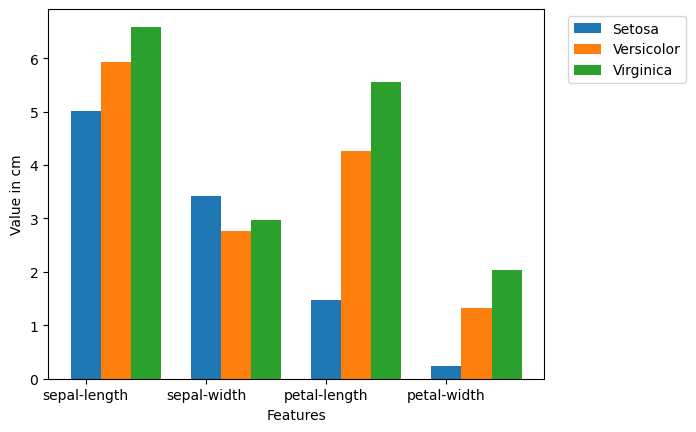

In [53]:
# Plot the average 
plt.bar(X_axis, y_data_reshaped[0], width, label='Setosa')
plt.bar(X_axis + width, y_data_reshaped[1], width, label='Versicolor')
plt.bar(X_axis + 2 * width, y_data_reshaped[2], width, label='Virginica')
plt.xticks(X_axis, names[:4])
plt.xlabel('Features')
plt.ylabel('Value in cm')
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [11]:
# Split-ou validation dataset
array = dataset.values
X = array[:, 0:4]
y = array[:,4]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [30]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)'%(name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


**StratifiedKFold** :  ensures that each fold is representative of the whole dataset, particularly with respect to the target variable's distribution<br>
--> n_splits=10:  the dataset will be split into 10 folds.<br>
--> random_state=1:  ensures reproducibility by fixing the random seed.<br>
--> shuffle=True  :  ensures randomness.<br><br>
**cross_validation** : splits the data into the specified number of folds (using the kfold strategy)<br>
--> The model is trained on a subset of the data, and evaluated on the remaining fold.<br>
--> cv_results : a list of accuracy scores for each fold of cross-validation.<br>
So here i'm : <br>
*) evaluated multiple models using k-fold cross-validation.<br>
*) compared their average accuracy and consistency (standard deviation).<br>
*) used the StratifiedKFold to ensure that each fold has a similar class ditribution.

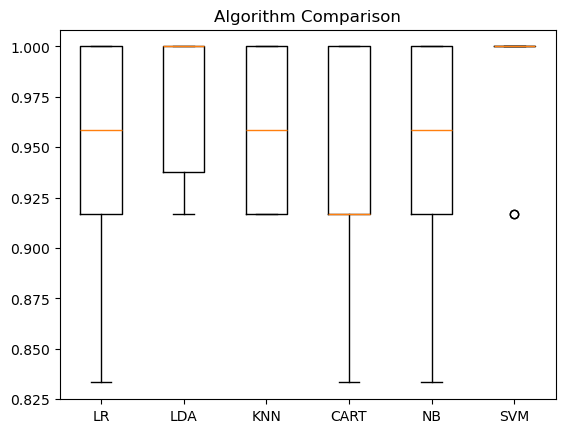

In [32]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

The best model is : SVM

In [33]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

In [34]:
# Evaluation predictions
accuracy_score(y_validation, predictions)

0.9666666666666667

In [35]:
confusion_matrix(y_validation, predictions)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [37]:
print(classification_report(y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [56]:
X_new = np.array([[3, 2, 1, 0.2],
                  [4.9, 2.2, 3.8, 1.1],
                  [5.3, 2.5, 4.6, 1.9]])
# Prediction of the species from the input vector
prediction = model.predict(X_new)
print('Prediction of Species : {}'.format(prediction))

Prediction of Species : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
